In [1]:
import astroaugmentations as AA
import albumentations as A
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
BREAK = 3

/home/micah/Documents/priors/AstroAugmentations/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load in data and set up transform

In [2]:
data = AA.datasets.MiraBest_F.MiraBest_FITS(data_folder="/home/micah/Documents/data/MiraBest_FITS")


In [3]:
transform = A.Compose([
    A.Lambda(
        name="UVAugmentation",
        image=AA.image_domain.radio.UVAugmentation(
            dropout_p=1,
            dropout_mag=0.5,
            noise_p=1,
            noise_mag=0.5,
            rfi_p=1,
            rfi_mag=5,
            rfi_prob=0.01
        ), p=1)
])
train = AA.datasets.MiraBest_F.MiraBest_FITS(
    data_folder="/home/micah/Documents/data/MiraBest_FITS", 
    train=True, 
    test_size=0.2,
    transform=transform
)
train

Dataset MiraBest_FITS
    Number of datapoints: 1004
    Split: train
    Location: /home/micah/Documents/data/MiraBest_FITS
    Transforms (if any): Compose([
                           Lambda(name='UVAugmentation', image=<astroaugmentations.image_domain.radio.UVAugmentation object at 0x7fa28cf32290>, mask=<function noop at 0x7fa339fa0af0>, keypoint=<function noop at 0x7fa339fa0af0>, bbox=<function noop at 0x7fa339fa0af0>, always_apply=False, p=1),
                         ], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})
    Target Transforms (if any): None

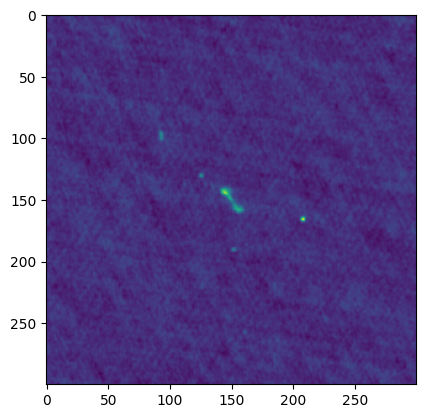

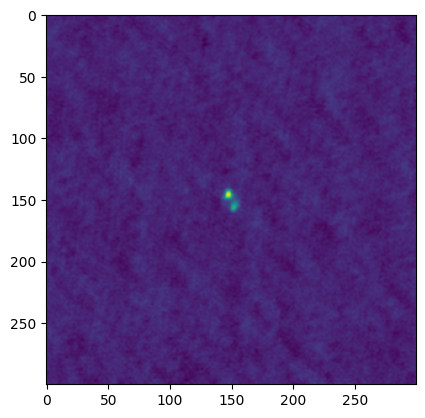

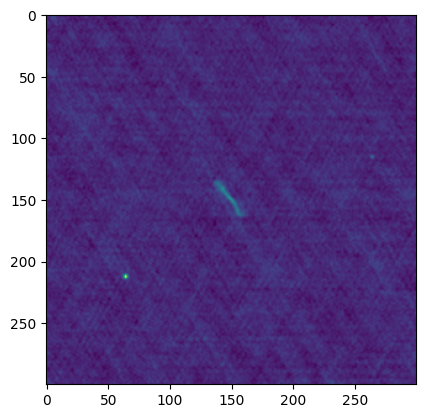

In [4]:
for idx, (image, target) in enumerate(train):
    if idx>=BREAK:
        break
    plt.imshow(image.squeeze())
    plt.show()

# Data Class Exploration

In [5]:
data[0]

(array([[[ 4.3270717e-05, -1.7469931e-04, -2.9258739e-04, ...,
          -5.1486666e-05, -1.4989282e-04, -2.0678363e-04],
         [ 2.6228494e-04, -3.3334032e-05, -2.2611037e-04, ...,
          -1.1491779e-04, -3.3256369e-05,  8.2278544e-05],
         [ 3.4536692e-04,  1.3040421e-04, -4.9565191e-05, ...,
           1.2811758e-05,  6.3480904e-05,  2.5245256e-04],
         ...,
         [ 3.2847438e-05,  1.2161914e-04,  1.6261369e-04, ...,
          -1.7492101e-04, -1.2660479e-04, -5.9050468e-05],
         [ 5.3770313e-05,  1.2316450e-04,  1.2643027e-04, ...,
          -1.4146090e-04, -1.6680993e-04, -1.6351471e-04],
         [ 6.7599853e-05,  8.1085374e-05,  1.7789636e-05, ...,
          -6.2768857e-05, -4.5682864e-05, -3.3615721e-05]]], dtype=float32),
 1)

In [6]:
data.df

,file_path,class,confidence,subgroup,ra,dec,z,extent
1183,/home/micah/Documents/data/MiraBest_FITS/210_1...,FR2,uncertain,0,162.919,10.996,0.2126,31.40
199,/home/micah/Documents/data/MiraBest_FITS/200_1...,FR2,confident,0,120.283,43.842,0.2553,18.84
874,/home/micah/Documents/data/MiraBest_FITS/100_2...,FR1,confident,0,208.973,26.372,0.1407,47.35
1155,/home/micah/Documents/data/MiraBest_FITS/100_1...,FR1,confident,0,122.923,10.487,0.2770,64.25
945,/home/micah/Documents/data/MiraBest_FITS/110_1...,FR1,uncertain,0,177.857,54.835,0.1433,57.90
...,...,...,...,...,...,...,...,...
1044,/home/micah/Documents/data/MiraBest_FITS/110_2...,FR1,uncertain,0,250.832,13.350,0.1832,26.93
1095,/home/micah/Documents/data/MiraBest_FITS/110_1...,FR1,uncertain,0,186.195,18.426,0.1690,14.13
1130,/home/micah/Documents/data/MiraBest_FITS/100_2...,FR1,confident,0,225.172,36.363,0.2552,32.20
860,/home/micah/Documents/data/MiraBest_FITS/200_2...,FR2,confident,0,252.720,41.079,0.3175,10.40


In [7]:
len(data)

1004

# Plotting original, transformed and differences

Top rows are in image space.

Bottom rows are in fourrier space (absolute visualisations of them).

In [8]:
def plot_example_samples(image, transform):
    tr = transform(image)
    fig, ax = plt.subplots(2, 3, figsize=(15,10))
    ax[0,0].imshow(image.squeeze())
    ax[0,1].imshow(tr.squeeze())
    ax[0,2].imshow(tr.squeeze()-image.squeeze())
    
    ax[1,0].imshow(np.abs(np.fft.fftshift(np.fft.fft2(image))).squeeze())
    ax[1,1].imshow(np.abs(np.fft.fftshift(np.fft.fft2(tr))).squeeze())
    ax[1,2].imshow(np.abs(np.fft.fftshift(np.fft.fft2(tr))).squeeze() - np.abs(np.fft.fftshift(np.fft.fft2(image))).squeeze())
    
    plt.show()


(1, 300, 300) 1
(1, 300, 300)
-0.0006340196173576784 0.005102108126333636
-0.0004467106684970057 0.0026556782178569134


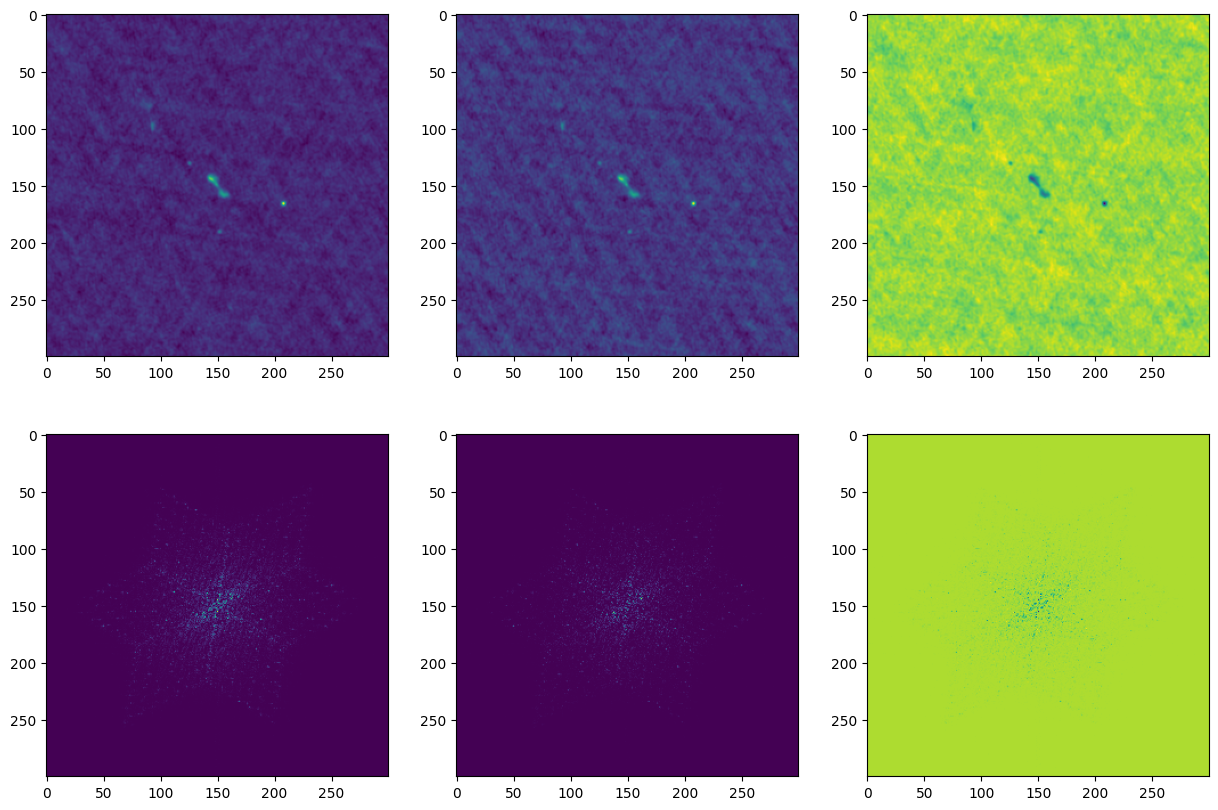

0
(1, 300, 300) 1
(1, 300, 300)
-0.0006302415871020398 0.005574296424710454
-0.0005047763472201017 0.002964459512170246


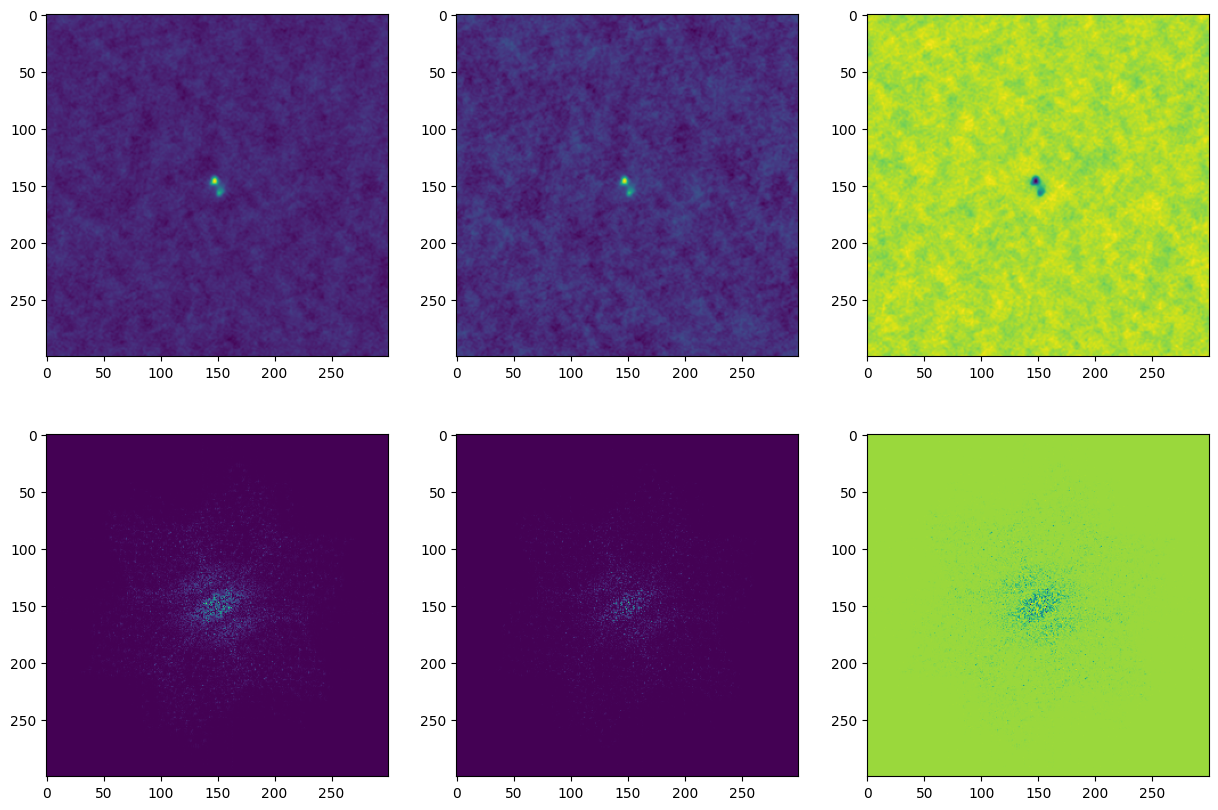

1
(1, 300, 300) 0
(1, 300, 300)
-0.000567200512891136 0.003837434370727174
-0.00035131757761594956 0.0018727792596784254


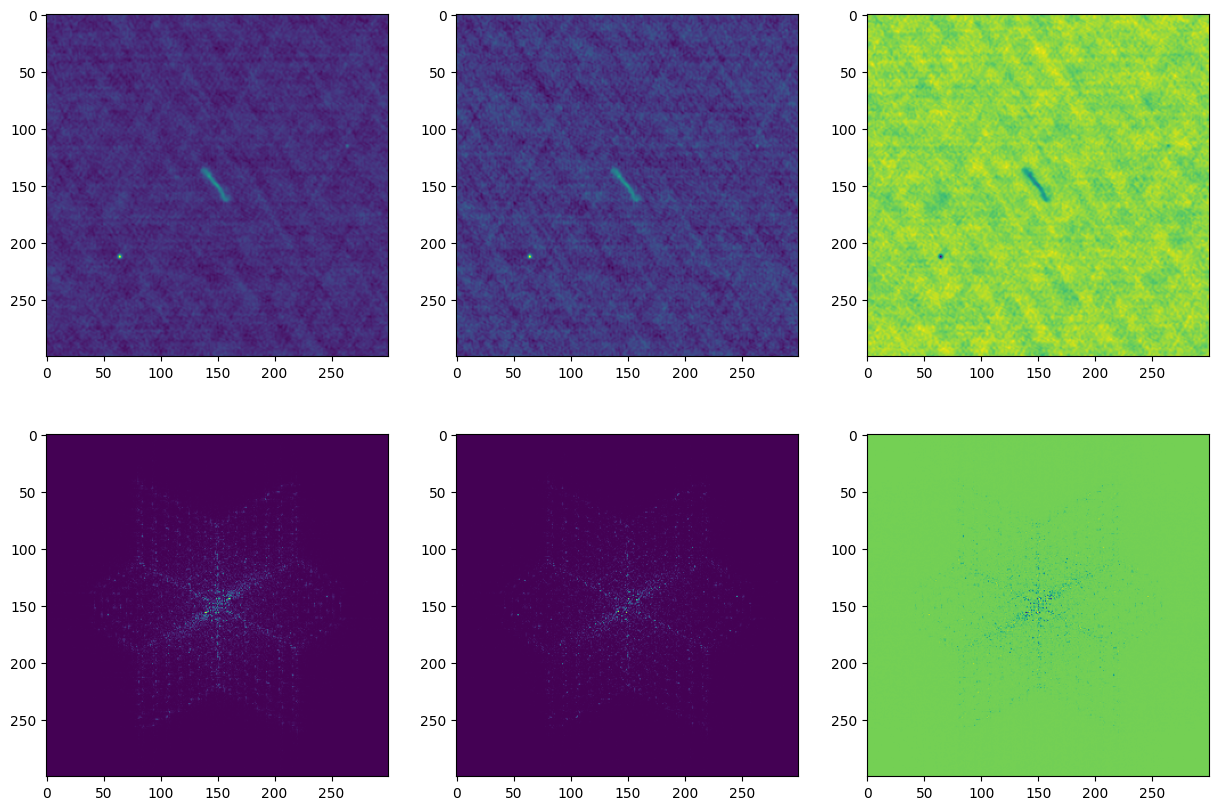

2


In [9]:
transform = AA.image_domain.radio.UVAugmentation(
    dropout_p=1, 
    dropout_mag=0.5, 
    
    noise_p=1,
    noise_mag=0.5,
    
    rfi_p=0,
    rfi_mag=10,
    rfi_prob=0.01
)


for idx, (img, target) in enumerate(train):
    if idx>=BREAK:
        break
    print(img.shape, target)
    tr = transform(img)
    print(transform(img).shape)
    print(img.min(), img.max())
    print(tr.min(), tr.max())
    plot_example_samples(img, transform)
    print(idx)